In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.Income.fillna(df.Income.mean(), inplace=True)

In [9]:
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [12]:
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
df.Dt_Customer.value_counts()

Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64

In [14]:
date_ = df["Dt_Customer"]

In [15]:
df.drop(["Dt_Customer"], axis=1, inplace=True)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df["Marital_Status"] = df["Marital_Status"].str.replace("Together", "Married")
df.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       480
Divorced     232
Widow         77
Alone          3
Absurd         2
YOLO           2
Name: count, dtype: int64

In [18]:
df["Marital_Status"] = df["Marital_Status"].str.replace("Alone", "Single")
df.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Absurd         2
YOLO           2
Name: count, dtype: int64

In [19]:
df = df[(df["Marital_Status"] != "Absurd") & (df["Marital_Status"] != "YOLO")]
df.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
df_ = df.copy()

In [22]:
enc = LabelEncoder()

df["Education"] = enc.fit_transform(df["Education"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   int64  
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   int64 

In [24]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,Single,58138.000000,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,Single,46344.000000,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,Married,71613.000000,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,Married,26646.000000,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,Married,58293.000000,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,3,Married,62513.000000,0,1,16,520,42,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,2,Divorced,55635.000000,0,1,34,235,65,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,4,Married,33454.000000,1,0,32,76,10,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,4,Married,30351.000000,1,0,19,14,0,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,4,Married,5648.000000,1,1,68,28,0,...,20,1,0,0,0,0,0,3,11,0


In [25]:
enc = LabelEncoder()
df["Marital_Status"] = enc.fit_transform(df["Marital_Status"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   int64  
 3   Marital_Status       2236 non-null   int64  
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   int64 

In [27]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df)

In [28]:
scaled

array([[-0.02082034, -0.98485442, -0.34881801, ...,  0.        ,
         0.        ,  2.39477343],
       [-1.05333234, -1.23531519, -0.34881801, ...,  0.        ,
         0.        , -0.41757604],
       [-0.44707828, -0.31695906, -0.34881801, ...,  0.        ,
         0.        , -0.41757604],
       ...,
       [ 0.51731876,  1.01883166, -0.34881801, ...,  0.        ,
         0.        , -0.41757604],
       [ 0.81474385, -1.06834135,  0.54052871, ...,  0.        ,
         0.        , -0.41757604],
       [ 1.17535252, -1.23531519,  1.42987542, ...,  0.        ,
         0.        ,  2.39477343]])

In [29]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components = 2)
pca_ = pca.fit_transform(scaled)

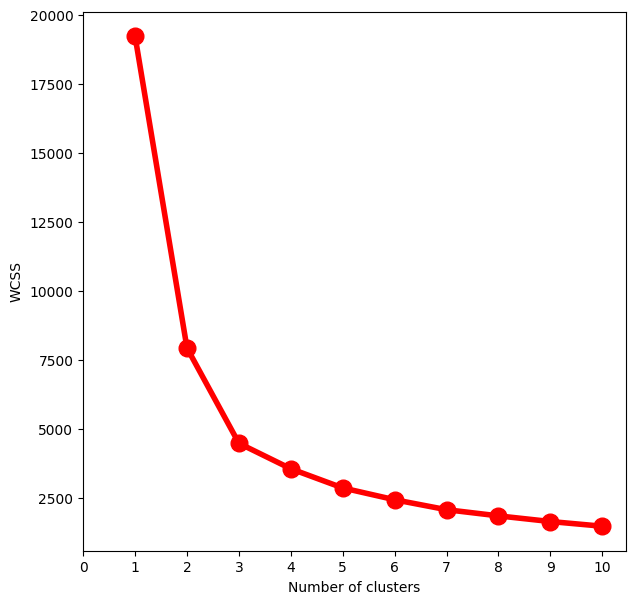

In [31]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(pca_)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimum clusters is 3

In [32]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(pca_)

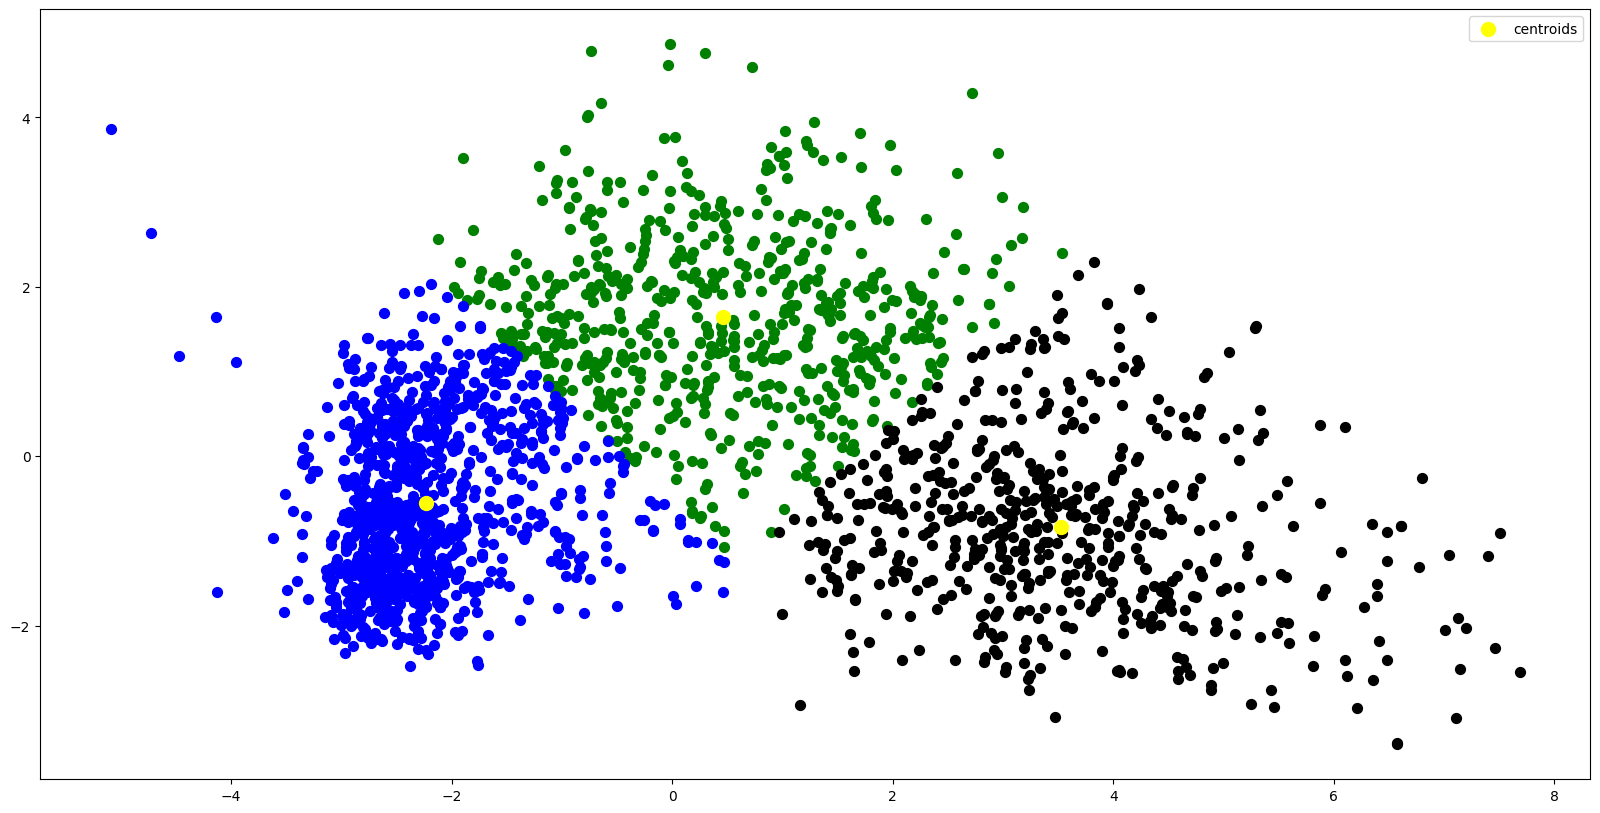

In [45]:
x = pca_

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green')
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue')
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.legend()
plt.show()

In [34]:
y_clusters

array([2, 1, 2, ..., 0, 0, 1], dtype=int32)

In [35]:
df_["cluster"] = y_clusters
df_["date"] = date_

In [36]:
df_.to_csv("customer analysis.csv", index=False)

In [37]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,2,58138.000000,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,2,46344.000000,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,1,71613.000000,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,1,26646.000000,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,1,58293.000000,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,3,1,62513.000000,0,1,16,520,42,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,2,0,55635.000000,0,1,34,235,65,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,4,1,33454.000000,1,0,32,76,10,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,4,1,30351.000000,1,0,19,14,0,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,4,1,5648.000000,1,1,68,28,0,...,20,1,0,0,0,0,0,3,11,0


<Axes: >

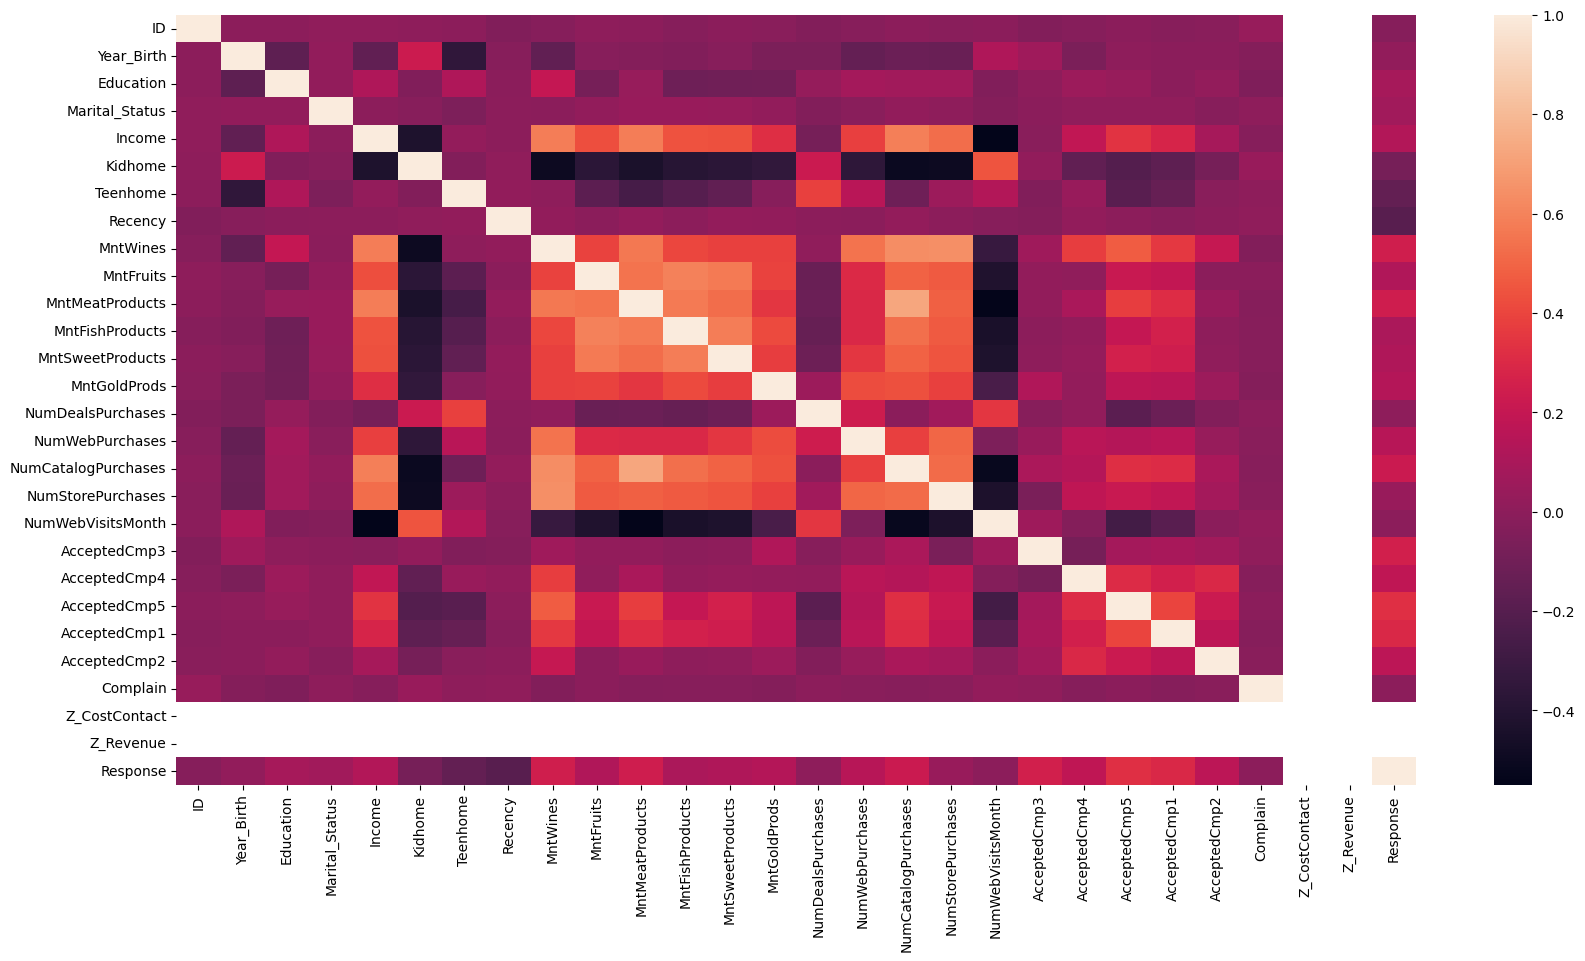

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [39]:
df.corr().describe().iloc[:,-1]

count    26.000000
mean      0.132831
std       0.219873
min      -0.198118
25%       0.006054
50%       0.120841
75%       0.209298
max       1.000000
Name: Response, dtype: float64

In [40]:
df['cluster'] = y_clusters

In [41]:
df[df['cluster']==0].describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.0,637.000000,637.0
mean,5501.822606,1963.828885,2.706436,1.105181,58234.434868,0.224490,0.945055,48.725275,461.251177,21.609105,...,0.058085,0.142857,0.014129,0.031397,0.015699,0.009419,3.0,11.0,0.108320,0.0
std,3314.758905,9.684841,1.041666,0.661085,10629.457141,0.443148,0.414131,28.364455,288.888767,25.969614,...,0.234087,0.350202,0.118114,0.174526,0.124404,0.096670,0.0,0.0,0.311029,0.0
min,1.000000,1943.000000,0.000000,0.000000,4428.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.0
25%,2698.000000,1956.000000,2.000000,1.000000,51518.000000,0.000000,1.000000,25.000000,231.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.0
50%,5389.000000,1964.000000,2.000000,1.000000,58398.000000,0.000000,1.000000,50.000000,393.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.0
75%,8534.000000,1972.000000,4.000000,1.000000,65275.000000,0.000000,1.000000,71.000000,620.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.0
max,11176.000000,1992.000000,4.000000,3.000000,113734.000000,2.000000,2.000000,99.000000,1459.000000,142.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,0.0


In [42]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

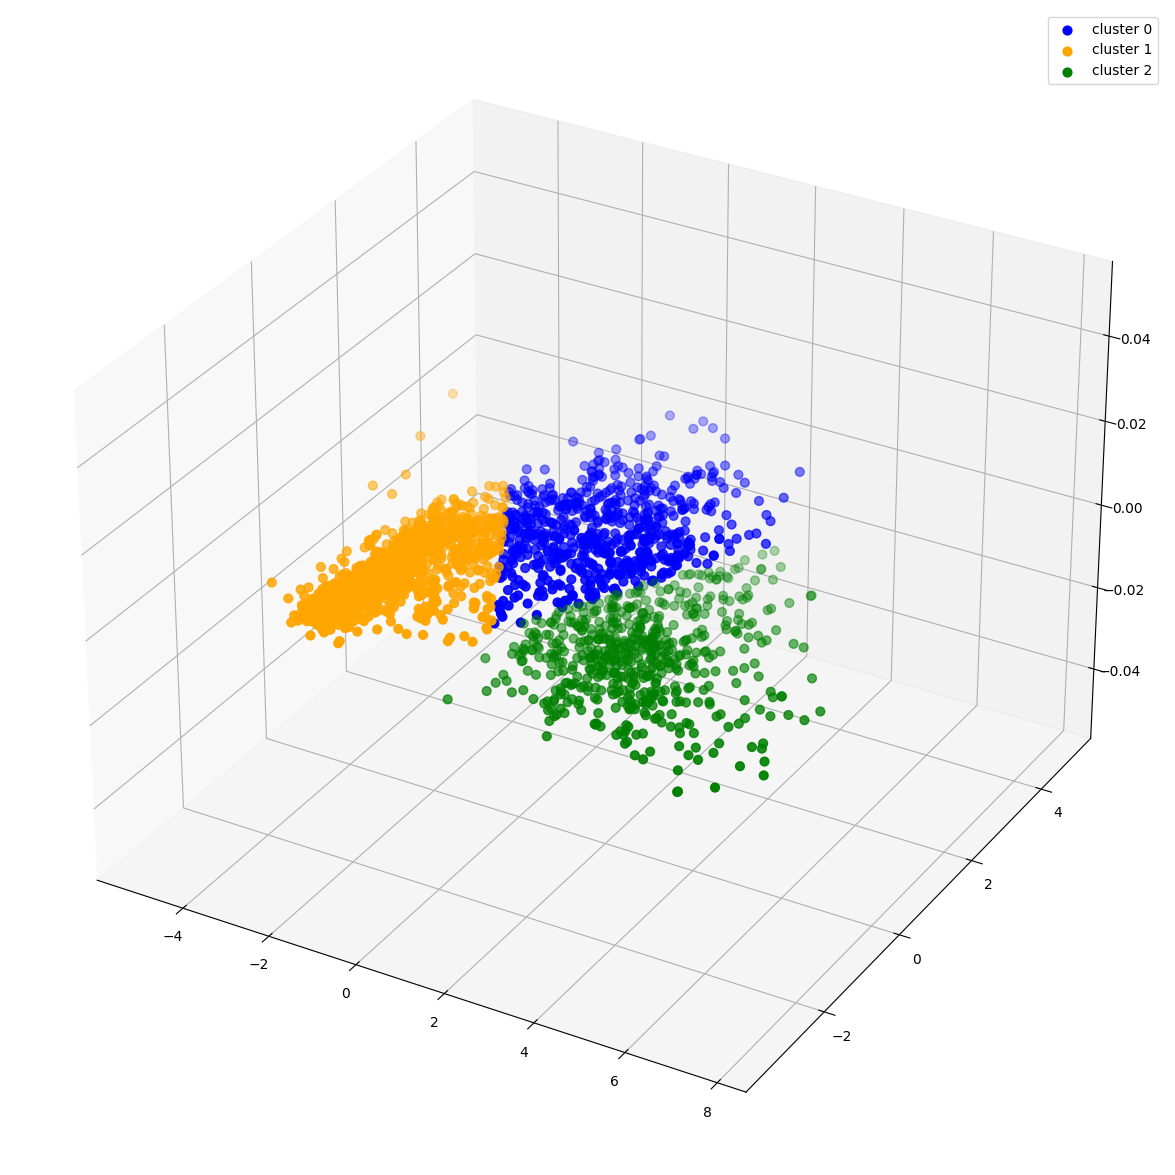

In [44]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1], s = 40 , color = 'green', label = "cluster 2")
ax.legend()
plt.show()